In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [2]:
gen = ImageDataGenerator(rotation_range=20, 
                         shear_range=0.2, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         horizontal_flip=True)

augment_ratio = 1.5 # 전체 데이터의 150%
augment_size = int(augment_ratio * x_train.shape[0])

randidx = np.random.randint(x_train.shape[0], size=augment_size)

x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()

x_augmented, y_augmented = gen.flow(x_augmented, y_augmented, batch_size=augment_size, shuffle=False).next()

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

s = np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train = x_train[s]
y_train = y_train[s]

In [4]:
cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256, (3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu')) # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax')) # 출력층

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
489/489 [==============================] - 27s 28ms/step - loss: 1.7541 - accuracy: 0.3409 - val_loss: 1.3071 - val_accuracy: 0.5234
Epoch 2/250
489/489 [==============================] - 13s 26ms/step - loss: 1.3380 - accuracy: 0.5206 - val_loss: 1.0975 - val_accuracy: 0.6011
Epoch 3/250
489/489 [==============================] - 13s 27ms/step - loss: 1.1617 - accuracy: 0.5900 - val_loss: 0.9218 - val_accuracy: 0.6757
Epoch 4/250
489/489 [==============================] - 13s 27ms/step - loss: 1.0572 - accuracy: 0.6321 - val_loss: 0.8941 - val_accuracy: 0.6800
Epoch 5/250
489/489 [==============================] - 15s 30ms/step - loss: 0.9797 - accuracy: 0.6614 - val_loss: 0.7618 - val_accuracy: 0.7257
Epoch 6/250
489/489 [==============================] - 18s 36ms/step - loss: 0.9232 - accuracy: 0.6824 - val_loss: 0.7592 - val_accuracy: 0.7294
Epoch 7/250
489/489 [==============================] - 17s 34ms/step - loss: 0.8791 - accuracy: 0.6981 - val_loss: 0.6984 - val_ac

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4462 - accuracy: 0.8587


[0.4461972117424011, 0.8586999773979187]

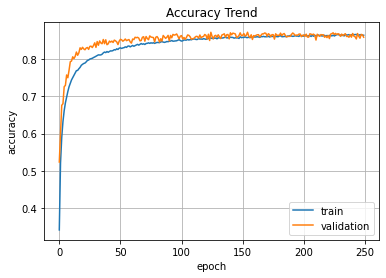

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

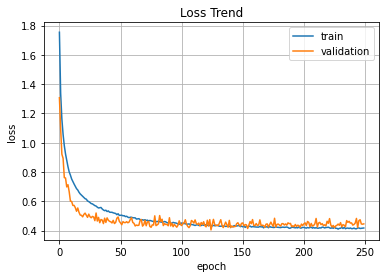

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()